In [4]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
from IPython.display import display, clear_output

######################################################
#  Setting fiducial parameters
#  Planck18 TT,TE,EE+lowE+lensing+BAO
######################################################

ln10e10As = 3.047
As = np.exp(ln10e10As)/(10**10)

standard_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "ln10^{10}A_s": ln10e10As,
    "H0": 67.66
}

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
fsize=14


######################################################
#  Configuring the run
######################################################

zmin_pert = 300
zmax_pert = 2500

xe_pert_num = 80
#xe_pert_amps = ".01,.01,.02,.01"
#xe_single_width = (zmax_pert-zmin_pert)/(80)/2.355
#xe_pert_pivots = "900,1100,1500,2000"
mode = np.load("hubble_mode.npy")
pivots = np.load("hubble_pivots.npy")
xe_pert_amps = ",".join("{:f}".format(0.1*x) for x in mode)
xe_single_width = (zmax_pert-zmin_pert)/(80)/2.355
xe_pert_pivots = ",".join("{:f}".format(x) for x in pivots)

common_settings = {'output' : 'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'H0':standard_params["H0"],
                   'omega_b':standard_params["omega_b"],
                   'omega_cdm':standard_params["omega_cdm"],
                   'ln10^{10}A_s': standard_params["ln10^{10}A_s"],
                   'n_s':standard_params["n_s"],
                   'tau_reio': standard_params["tau_reio"],
                   'thermodynamics_verbose': 0,
                   'input_verbose': 0,
                   'lensing': 'yes',
                   'perturb_xe': 'yes',
                   'as_joint_mode': 'yes',
                   'xe_mode_amp': 1.0,
                   'xe_pert_num': xe_pert_num,
                   'zmin_pert': zmin_pert,
                   'zmax_pert': zmax_pert,
                   'xe_pert_amps': xe_pert_amps,
                   'xe_single_width': xe_single_width,
                   'xe_pert_pivots': xe_pert_pivots
                  }

print(xe_pert_pivots)
#print(len(xe_pert_pivots.split(",")))
print(xe_single_width)

M = Class.Class()
M.set(common_settings)

300.000000,327.848101,355.696203,383.544304,411.392405,439.240506,467.088608,494.936709,522.784810,550.632911,578.481013,606.329114,634.177215,662.025316,689.873418,717.721519,745.569620,773.417722,801.265823,829.113924,856.962025,884.810127,912.658228,940.506329,968.354430,996.202532,1024.050633,1051.898734,1079.746835,1107.594937,1135.443038,1163.291139,1191.139241,1218.987342,1246.835443,1274.683544,1302.531646,1330.379747,1358.227848,1386.075949,1413.924051,1441.772152,1469.620253,1497.468354,1525.316456,1553.164557,1581.012658,1608.860759,1636.708861,1664.556962,1692.405063,1720.253165,1748.101266,1775.949367,1803.797468,1831.645570,1859.493671,1887.341772,1915.189873,1943.037975,1970.886076,1998.734177,2026.582278,2054.430380,2082.278481,2110.126582,2137.974684,2165.822785,2193.670886,2221.518987,2249.367089,2277.215190,2305.063291,2332.911392,2360.759494,2388.607595,2416.455696,2444.303797,2472.151899,2500.000000
11.67728237791932


True

In [2]:
M.compute(level=["thermodynamics"])

dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


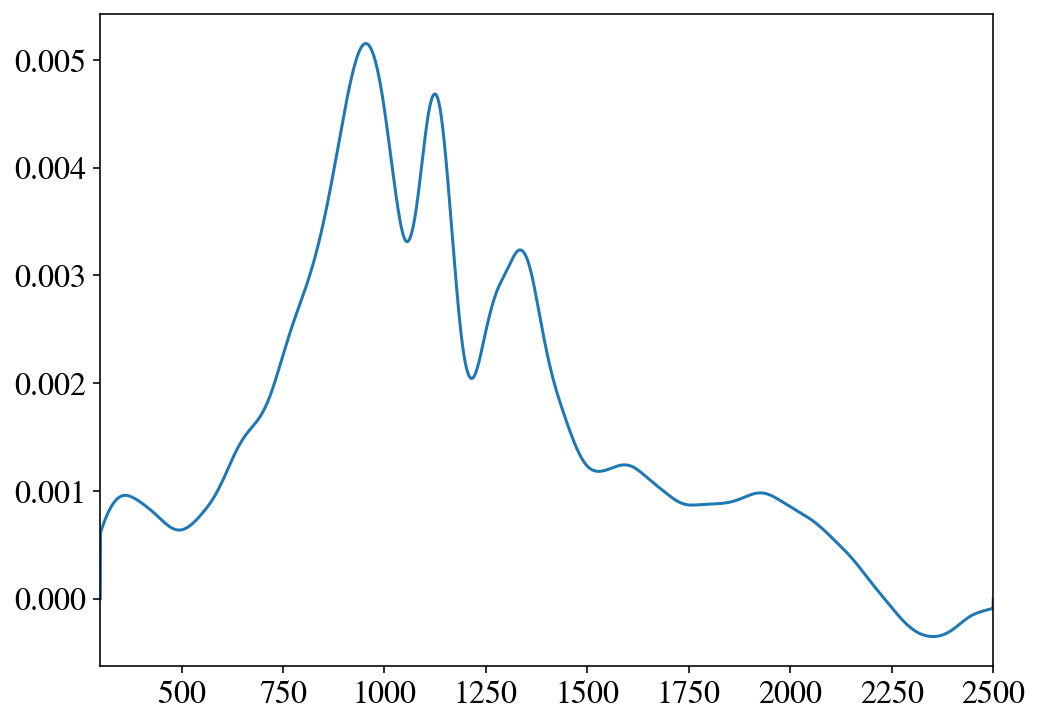

In [6]:
thermo = M.get_thermodynamics()
print(thermo.keys())
fig,ax = plt.subplots()

ax.plot(thermo['z'], thermo['xe_pert'])
#ax.plot(thermo['z'], thermo['x_fid'])

ax.set_xlim([zmin_pert,zmax_pert])
plt.show()

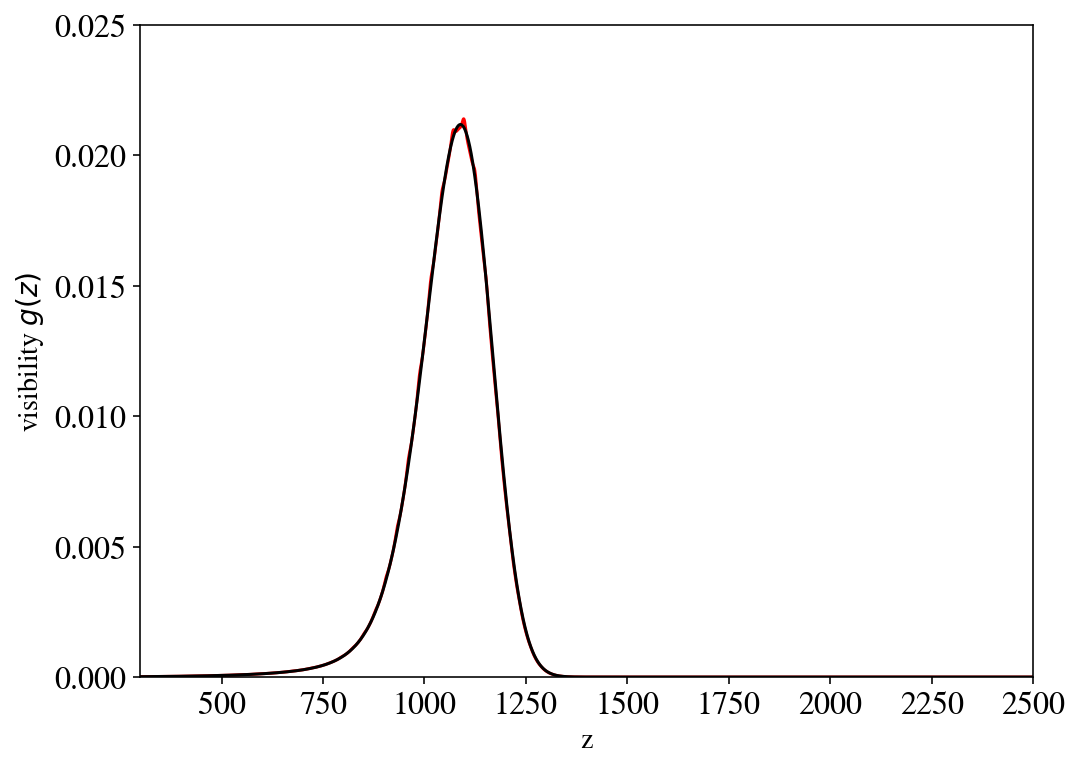

In [16]:
fig,ax = plt.subplots()
ax.plot(thermo1['z'], thermo1["kappa' [Mpc^-1]"]*thermo1["exp(-kappa)"], color='red')
ax.plot(thermo['z'], thermo["kappa' [Mpc^-1]"]*thermo["exp(-kappa)"], color='black')
ax.set_xlim([zmin_pert, zmax_pert])

ax.set_ylim([0, .025])

ax.set_xlabel('z', fontsize=fsize)
ax.set_ylabel('visibility $g(z)$', fontsize=fsize)
plt.show()

In [34]:
mode = np.load("hubble_mode.npy")
print(mode)
print(len(mode))
str_mode = ",".join(str(x) for x in mode)
print(str_mode)

[ 0.03220547  0.04545432  0.05048935  0.04917248  0.04544305  0.04071334
  0.03578156  0.03360086  0.03609068  0.04171637  0.04924888  0.05997973
  0.07219288  0.08121473  0.0880284   0.09911698  0.11633704  0.1339816
  0.14962026  0.16746144  0.19107127  0.22026011  0.24962923  0.26917019
  0.26865705  0.24434844  0.20383199  0.17536754  0.19292674  0.23661998
  0.24159164  0.18729042  0.12583241  0.1082881   0.12838622  0.14933169
  0.16114076  0.17055417  0.16212139  0.13462913  0.10882999  0.09070253
  0.07554413  0.06540754  0.06233538  0.06347967  0.06532615  0.06482093
  0.06109167  0.05641755  0.05194563  0.04790685  0.04596226  0.04601986
  0.04634172  0.04668542  0.04767623  0.04971049  0.05161767  0.05125384
  0.04859879  0.04520671  0.04189013  0.03829423  0.03369749  0.02838626
  0.02285692  0.01649973  0.00938435  0.00249858 -0.00420165 -0.0106048
 -0.01547605 -0.01804633 -0.01842309 -0.01658108 -0.01262073 -0.00846988
 -0.00620174 -0.00482202]
80
0.03220546673323118,0.04

In [10]:
test = lambda: 'yes'
print(test())

yes
